In [1]:
#ML Project

#flight fare prediction

#Importing requires libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


#reading the CSV file
df = pd.read_csv('flightdata.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [2]:
#Incpection of dataset
df.head()
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
dtypes: int64(1), str(10)
memory usage: 918.2 KB


In [4]:
df.shape

(10683, 11)

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
#Data Cleaning
#nulls, #Duplicates

#Detecting the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
df.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Handling Duplicates
df.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10683, dtype: bool

In [11]:
df[df.duplicated(keep = False)].sort_values(by=df.columns.tolist())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
...,...,...,...,...,...,...,...,...,...,...,...
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
1535,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2634,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


In [12]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [13]:
#Creating a copy for avoid disturbance
data = df.copy()

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
dtypes: int64(1), str(10)
memory usage: 918.2 KB


In [15]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

In [16]:
data['Date_of_journey_day'] = data['Date_of_Journey'].dt.day
data['Date_of_journey_month'] = data['Date_of_Journey'].dt.month
data['Date_of_journey_year'] = data['Date_of_Journey'].dt.year

data['Dep_Time_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Time_min'] = pd.to_datetime(data['Dep_Time']).dt.minute


In [17]:
# analyze no of flights departure at night
def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Afternoon'
    elif (x > 16) and (x <= 20):
        return 'Evening'
    else:
        return 'Late night'

<Axes: xlabel='Dep_Time_hour'>

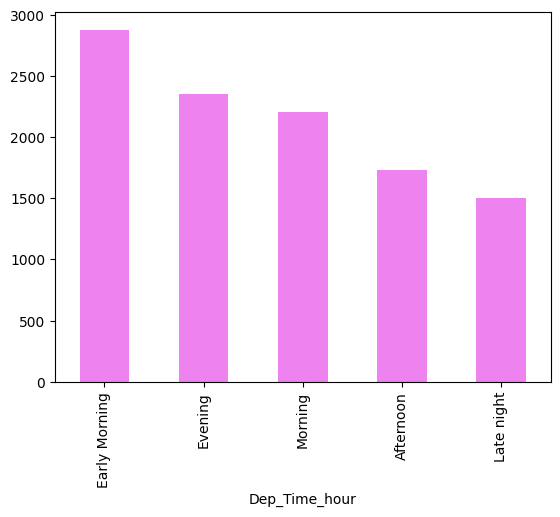

In [18]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='violet')

In [19]:
def preprocess_duration(x):

    # Step 1: Handle missing values
    if pd.isna(x):
        return "0h 0m"

    # Step 2: If only minutes are present (example: "45m")
    elif 'h' not in x and 'm' in x:
        return "0h " + x

    # Step 3: If only hours are present (example: "2h")
    elif 'h' in x and 'm' not in x:
        return x + " 0m"

    # Step 4: If both hours and minutes are already present
    else:
        return x


data['Duration'] = data['Duration'].apply(preprocess_duration)

data['Duration_hour'] = pd.to_timedelta(data['Duration']).dt.components.hours
data['Duration_min'] = pd.to_timedelta(data['Duration']).dt.components.minutes


In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_journey_day,Date_of_journey_month,Date_of_journey_year,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 0m,2 stops,No info,13882,9,6,2019,9,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,4,45


In [21]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date_of_journey_day',
       'Date_of_journey_month', 'Date_of_journey_year', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hour', 'Duration_min'],
      dtype='str')

In [22]:
#droping useless columns
col_to_drop = ["Date_of_Journey","Dep_Time","Arrival_Time","Duration"]
data.drop(col_to_drop,axis = 1, inplace = True)
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_journey_day,Date_of_journey_month,Date_of_journey_year,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,25


In [23]:
#Target encoding
data['Airline'].unique()

<StringArray>
[                           'IndiGo',                         'Air India',
                       'Jet Airways',                          'SpiceJet',
                 'Multiple carriers',                             'GoAir',
                           'Vistara',                          'Air Asia',
           'Vistara Premium economy',              'Jet Airways Business',
 'Multiple carriers Premium economy',                            'Trujet']
Length: 12, dtype: str

In [24]:
airlines = data.groupby('Airline')['Price'].mean().sort_values()

numbers = range(len(airlines))

zip(airlines, numbers)

dict_airlines = dict(zip(airlines.index, numbers))

data['Airline'] = data['Airline'].map(dict_airlines)

In [25]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_journey_day,Date_of_journey_month,Date_of_journey_year,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,3,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,50
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,25
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,19,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,5,25
4,3,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,4,45


In [26]:
#converting source to numberical values
data['Source'].unique()

<StringArray>
['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
Length: 5, dtype: str

In [27]:
#Applying one hot encoding
import pandas as pd

source_dummies = pd.get_dummies(data['Source'], prefix='Source').astype(int)

data = pd.concat([data, source_dummies], axis=1)

data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: str

In [28]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_journey_day,Date_of_journey_month,Date_of_journey_year,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,25,0,0,0,1,0


In [29]:
data['Destination'].unique()

<StringArray>
['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
Length: 6, dtype: str

In [30]:
destination = data.groupby('Destination')['Price'].mean().sort_values()

numbers = range(len(destination))

zip(destination, numbers)

dict_destination = dict(zip(destination.index, numbers))

data['Destination'] = data['Destination'].map(dict_destination)


In [31]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_journey_day,Date_of_journey_month,Date_of_journey_year,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,5,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,50,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,25,0,0,0,1,0


In [32]:
data['Total_Stops'].unique()

<StringArray>
['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']
Length: 6, dtype: str

In [33]:
# Correct mapping
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

# Apply mapping ONLY ONCE
data['Total_Stops'] = data['Total_Stops'].map(stop_mapping)

# Replace missing values
data['Total_Stops'] = data['Total_Stops'].fillna(0)


In [34]:
data['Total_Stops'].unique()


array([0., 2., 1., 3., 4.])

In [35]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_journey_day,Date_of_journey_month,Date_of_journey_year,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,5,BLR → DEL,0.0,No info,3897,24,3,2019,22,20,2,50,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,5,50,7,25,0,0,0,1,0


In [36]:
data['Date_of_journey_year'].unique()

array([2019], dtype=int32)

In [37]:
# Dropping unnecessary cols for good training

columns_to_drop = ['Source', 'Route', 'Additional_Info', 'Date_of_journey_year']

data.drop(columns_to_drop, axis=1, inplace=True)

In [38]:
data.head()

,Airline,Destination,Total_Stops,Price,Date_of_journey_day,Date_of_journey_month,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,5,0.0,3897,24,3,22,20,2,50,1,0,0,0,0
1,7,3,2.0,7662,1,5,5,50,7,25,0,0,0,1,0
2,10,4,2.0,13882,9,6,9,25,19,0,0,0,1,0,0
3,3,3,1.0,6218,12,5,18,5,5,25,0,0,0,1,0
4,3,5,1.0,13302,1,3,16,50,4,45,1,0,0,0,0


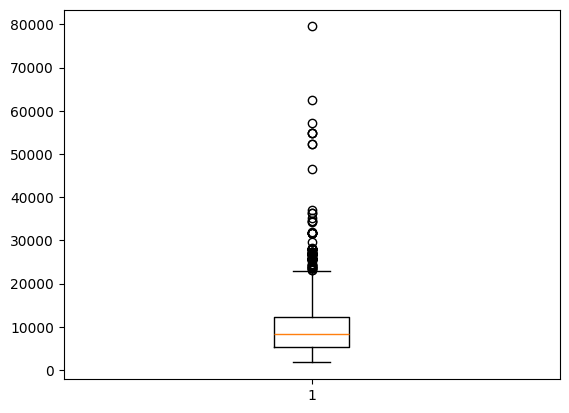

In [39]:
#Boxplot
import matplotlib.pyplot as plt

plt.boxplot(data["Price"])
plt.show()

In [40]:
#IQR method

q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)

len([price for price in data['Price'] 
     if price > maximum or price < minimum])

94

In [41]:
data.shape

(10683, 15)

In [42]:
print([Price for Price in data['Price']if Price > maximum or Price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [43]:
data['price'] = np.where(data['Price']> 35000, data['Price'].median,data['Price'])

In [44]:
median = data['Price'].median()

data['Price'] = np.where(
    data['Price'] > 35000,
    median,
    data['Price']
).astype(int)


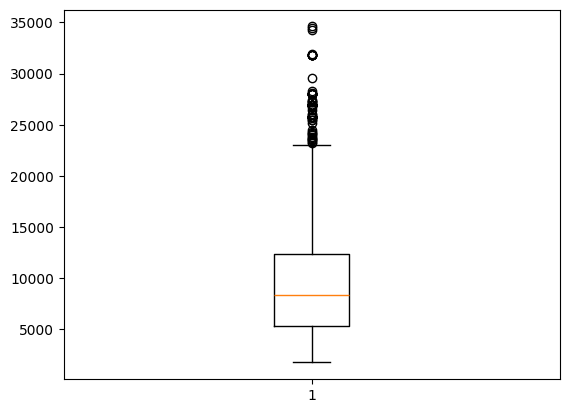

In [45]:
import matplotlib.pyplot as plt

plt.boxplot(data["Price"])
plt.show()


In [46]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Date_of_journey_day',
       'Date_of_journey_month', 'Dep_Time_hour', 'Dep_Time_min',
       'Duration_hour', 'Duration_min', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'price'],
      dtype='str')

In [47]:
data.head()

,Airline,Destination,Total_Stops,Price,Date_of_journey_day,Date_of_journey_month,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,price
0,3,5,0.0,3897,24,3,22,20,2,50,1,0,0,0,0,3897
1,7,3,2.0,7662,1,5,5,50,7,25,0,0,0,1,0,7662
2,10,4,2.0,13882,9,6,9,25,19,0,0,0,1,0,0,13882
3,3,3,1.0,6218,12,5,18,5,5,25,0,0,0,1,0,6218
4,3,5,1.0,13302,1,3,16,50,4,45,1,0,0,0,0,13302


In [49]:
# Convert everything to numeric safely
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN with 0
data.fillna(0, inplace=True)


,Airline,Destination,Total_Stops,Price,Date_of_journey_day,Date_of_journey_month,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,price
0,3,5,0.0,3897,24,3,22,20,2,50,1,0,0,0,0,3897.0
1,7,3,2.0,7662,1,5,5,50,7,25,0,0,0,1,0,7662.0
2,10,4,2.0,13882,9,6,9,25,19,0,0,0,1,0,0,13882.0
3,3,3,1.0,6218,12,5,18,5,5,25,0,0,0,1,0,6218.0
4,3,5,1.0,13302,1,3,16,50,4,45,1,0,0,0,0,13302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0.0,4107,9,4,19,55,2,30,0,0,0,1,0,4107.0
10679,7,3,0.0,4145,27,4,20,45,2,35,0,0,0,1,0,4145.0
10680,10,2,0.0,7229,27,4,8,20,3,0,1,0,0,0,0,7229.0
10681,5,5,0.0,12648,1,3,11,30,2,40,1,0,0,0,0,12648.0


In [53]:
# Training the model using RFR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Defining features and target
X = data.drop(['Price'], axis=1)
y = data['Price']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base model
ml_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dict = {
    'n_estimators': [300, 500, 700, 900, 1000],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20]
}

search = RandomizedSearchCV(
    estimator=ml_model,
    param_distributions=param_dict,
    cv=7,
    n_iter=30,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fitting model
search.fit(X_train, y_train)

best_model = search.best_estimator_

print("Best Parameters:", search.best_params_)

# Prediction
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

# Feature importance
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


Fitting 7 folds for each of 30 candidates, totalling 210 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 30}
MSE: 1040.3228796666313
R2 Score: 0.9999472938175141


,Feature,Importance
14,price,9.988149e-01
7,Duration_hour,8.745714e-04
13,Source_Mumbai,1.704215e-04
2,Total_Stops,4.368814e-05
1,Destination,4.361640e-05
6,Dep_Time_min,1.667943e-05
11,Source_Delhi,8.874236e-06
8,Duration_min,8.790856e-06
5,Dep_Time_hour,7.052007e-06
3,Date_of_journey_day,5.862303e-06


In [59]:
# saving and loading the file using pickle

import pickle

# Save
with open('rd_random.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Load
with open('rd_random.pkl', 'rb') as file:
    rf_random = pickle.load(file)

# Predict using loaded model
y_pred2 = rf_random.predict(X_test)

# Evaluate
r22 = r2_score(y_test, y_pred2)

print("R2 after loading:", r22)


R2 after loading: 0.9999472938175141
